## Лабораторная работа № 3 по дисциплине "Технологии программирования"
### Задание по библиотекам Pandas и Matplotlib

**Цель работы:** Получить навыки анализа, обработки и визуализации датасетов с применением библиотек Pandas
и Matplotlib.

**Задача:** Провести анализ датасета о пассажирах Титаника по нижеприведённым заданиям.

### Ход работы

Подключаем необходимые библиотеки:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

from pathlib import Path
import urllib

Скачиваем датасет с информацией о пассажирах Титаника:

In [2]:
titanic = Path('titanic.csv')
if not titanic.exists():
    urllib.request.urlretrieve('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv', titanic)

Проверяем наличие скачанного датасета:



In [3]:
print(titanic.exists())

True


Значения колонок датасета следующие (__в соответствии с информацией с сайта__):
*    Survived Indicator (выжил пассажир или нет)
*    Passenger Class (класс)
*    Name (имя)
*    Sex (пол)
*    Age (возраст)
*    Siblings/Spouses Aboard (есть ли братья, сестры или супруг(а) на борту)
*    Parents/Children Aboard (есть ли родители или дети на борту)
*    Fare paid in £s (цена билета в фунтах стерлингов)

Загружаем данные и формируем Pandas DataFrame:

In [4]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


__С использованием датафрейма нужно выполнить следующие задания__.

1. Определите, содержит ли какой-нибудь столбец датасета пропущенные значения.

In [5]:
df.isnull().sum().to_frame()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


2. В соответствии с вариантом, определите:

   1. Количество женщин старше 50 лет на борту.
   2. Количество пассажиров, путешествующих вторым классом вместе с родителями или детьми.
   3. Число погибших детей в возрасте до 12 лет, путешествующих первым классом.
   4. Среднее значение коэффициента выживаемости десяти пассажиров третьего класса с самыми дорогими билетами.
   5. Среднее значение цены билета пассажиров, путешествующих без родственников.

In [6]:
# Вариант 11 (1)
print('На борту %d женщин старше 50 лет' % len(df.loc[(df.Sex == 'female') & (df.Age > 50)]))

На борту 18 женщин старше 50 лет


3. Постройте диаграмму распределения значений цены билета по всем пассажирам. Проинтерпретируйте результат. Можно ли сказать, что в данных наблюдаются выбросы?

<AxesSubplot: >

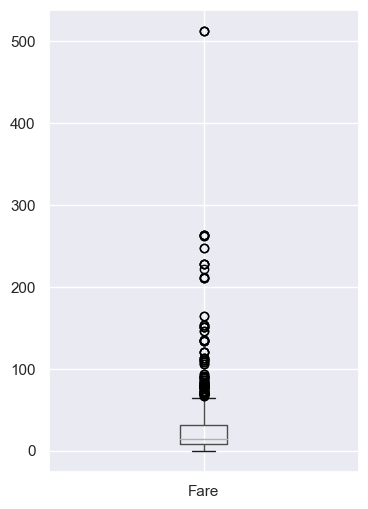

In [7]:
df.boxplot('Fare', figsize=(4, 6))

В датасете присутствуют выбросы, так как есть точки, находящиеся за "усами" графика.

4. В соответствии с вариантом, определите, верны ли следующие утверждения. Приведите доказательства ответа.

  1. Чем дороже билет, тем выше вероятность выжить.
  2. Мужчинам в катастрофе выжить проще.
  3. Чем больше родственников у человека, тем выше шанс того, что он купит билет третьего класса.
  4. Если Вам больше 70 лет, то шансов выжить в катастрофе у Вас практически нет.
  5. Чем больше родственников у чаловека, тем выше его шанс погибнуть.

In [8]:
# Вариант 11 (1)
df[['Survived', 'Fare']].groupby('Survived').mean()

,Fare
Survived,
0,22.208584
1,48.395408


В среднем, для выживших пассажиров цена билета получается выше, что свидетельствует о истиности данного утверждения

5. Столбец с именем пассажиров вряд ли будет иметь значение для последующего анализа данных. Удалите этот столбец из датафрейма. Выведите на экран полученный датасет.

In [9]:
df.drop('Name', axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


6. Столбец "пол пассажира" является категориальным. Закодируйте его с помощью ohe-hot-кодирования (OHE). Выведите на экран полученный датасет.

In [10]:
df = df.join(pd.get_dummies(df.Sex))
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,female,male
0,0,3,male,22.0,1,0,7.2500,0,1
1,1,1,female,38.0,1,0,71.2833,1,0
2,1,3,female,26.0,0,0,7.9250,1,0
3,1,1,female,35.0,1,0,53.1000,1,0
4,0,3,male,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,0,1
883,1,1,female,19.0,0,0,30.0000,1,0
884,0,3,female,7.0,1,2,23.4500,1,0
885,1,1,male,26.0,0,0,30.0000,0,1


7. Постройте диаграмму рассеяния между признаками "Возраст" и "Цена билета". Проинтерпретируйте ответ.

<AxesSubplot: xlabel='Age', ylabel='Fare'>

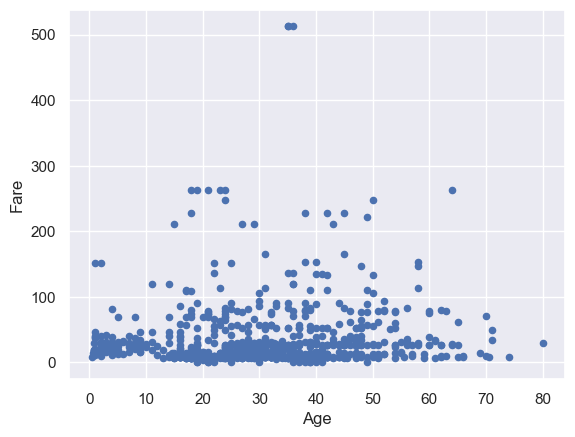

In [11]:
df.plot.scatter(x='Age', y='Fare')

По диаграмме видно, что возраст пассажира слабо влияет на цену билета

8. Отнормируйте значения признаков "Возраст" и "Цена билета". Выведите на экран полученный датасет.

In [12]:
# min-max norm
df.Age = (df.Age - df.Age.min()) / (df.Age.max() - df.Age.min())
df.Fare = (df.Fare - df.Fare.min()) / (df.Fare.max() - df.Fare.min())
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,female,male
0,0,3,male,0.271174,1,0,0.014151,0,1
1,1,1,female,0.472229,1,0,0.139136,1,0
2,1,3,female,0.321438,0,0,0.015469,1,0
3,1,1,female,0.434531,1,0,0.103644,1,0
4,0,3,male,0.434531,0,0,0.015713,0,1
...,...,...,...,...,...,...,...,...,...
882,0,2,male,0.334004,0,0,0.025374,0,1
883,1,1,female,0.233476,0,0,0.058556,1,0
884,0,3,female,0.082684,1,2,0.045771,1,0
885,1,1,male,0.321438,0,0,0.058556,0,1


9. Постройте гистограммы распределения пассажиров по полу и по возрасту для каждого класса. Расположите гистограммы одна под другой. Оси абсцисс должны быть однаковыми.

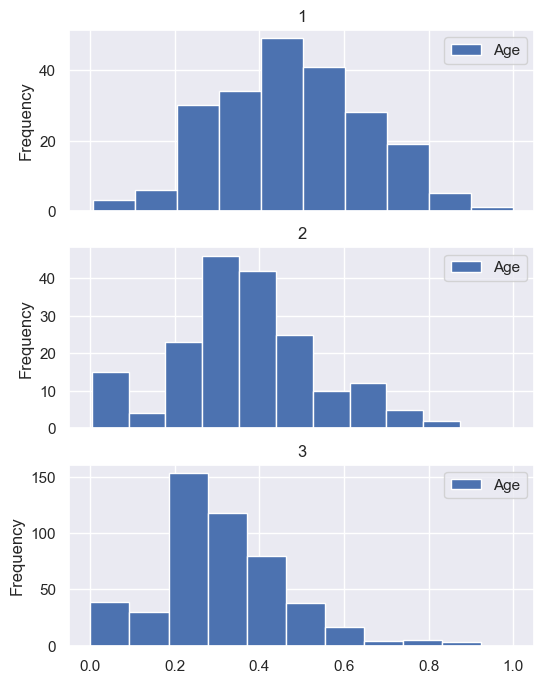

In [13]:
_ = df.plot.hist(column=['Age'], by='Pclass', figsize=(6, 8), sharex=True)

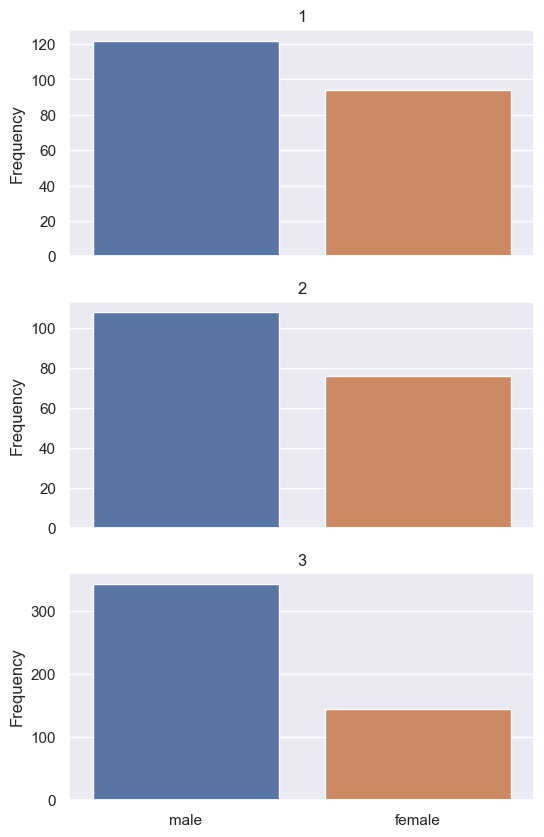

In [14]:
figure, axes = plt.subplots(3, 1, figsize=(6, 10), sharex=True)

for i, axis in enumerate(axes):
    sns.countplot(df.loc[df.Pclass == i + 1], x='Sex', order=['male', 'female'], ax=axis)
    axis.set_title(i + 1)
    axis.set_xlabel('')
    axis.set_ylabel('Frequency')

plt.show()

10. Сделайте выводы по работе.

### Вывод

Выполнив работу, я проанализировал датасет о пасажирах титаника при помощи библиотек `pandas` и `matplotlib`